In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import sparsetools as sp
from matplotlib.colors import LogNorm

In [69]:
obs = sp.profile('obs/ibis_alma6mod_alma3syn_obs.nc')
fit = sp.profile('both/ibis_alma6mod_alma3syn_fit_1.nc')
mod = sp.model('both/ibis_alma6mod_alma3syn_mod_1.nc')
fit_6 = sp.profile('alma6/ibis_alma6mod_fit_1.nc')
mod_6 = sp.model('alma6/ibis_alma6mod_mod_1.nc')
fit_3 = sp.profile('alma3syn/ibis_alma3syn_fit_1.nc')
mod_3 = sp.model('alma3syn/ibis_alma3syn_mod_1.nc')

profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1


In [14]:
from scipy.ndimage import gaussian_filter
obs.dat[0,:,:,48,0] = gaussian_filter(obs.dat[0,:,:,48,0],5)
chi = np.sum((fit.dat-obs.dat)**2/fit.weights,(3))[0,:,:,0]
chi_6 = np.sum((fit_6.dat-obs.dat)**2/fit_6.weights,(3))[0,:,:,0]
chi_3 = np.sum((fit_3.dat-obs.dat)**2/fit_3.weights,(3))[0,:,:,0]

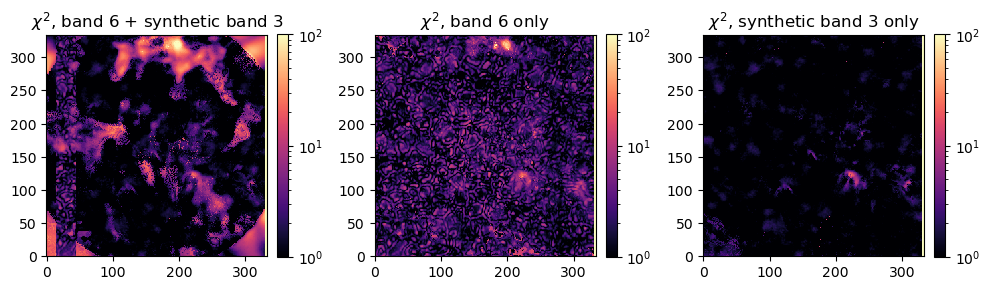

In [67]:
plt.figure(figsize=(10,3))
plt.subplot(131)
plt.imshow(chi,cmap='magma',origin='lower',norm=LogNorm(),vmin=1,vmax=100)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title(r'$\chi^2$, band 6 + synthetic band 3')
plt.subplot(132)
plt.imshow(chi_6,cmap='magma',origin='lower',norm=LogNorm(),vmin=1,vmax=100)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title(r'$\chi^2$, band 6 only')
plt.subplot(133)
plt.imshow(chi_3,cmap='magma',origin='lower',norm=LogNorm(),vmin=1,vmax=100)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title(r'$\chi^2$, synthetic band 3 only')
plt.tight_layout()

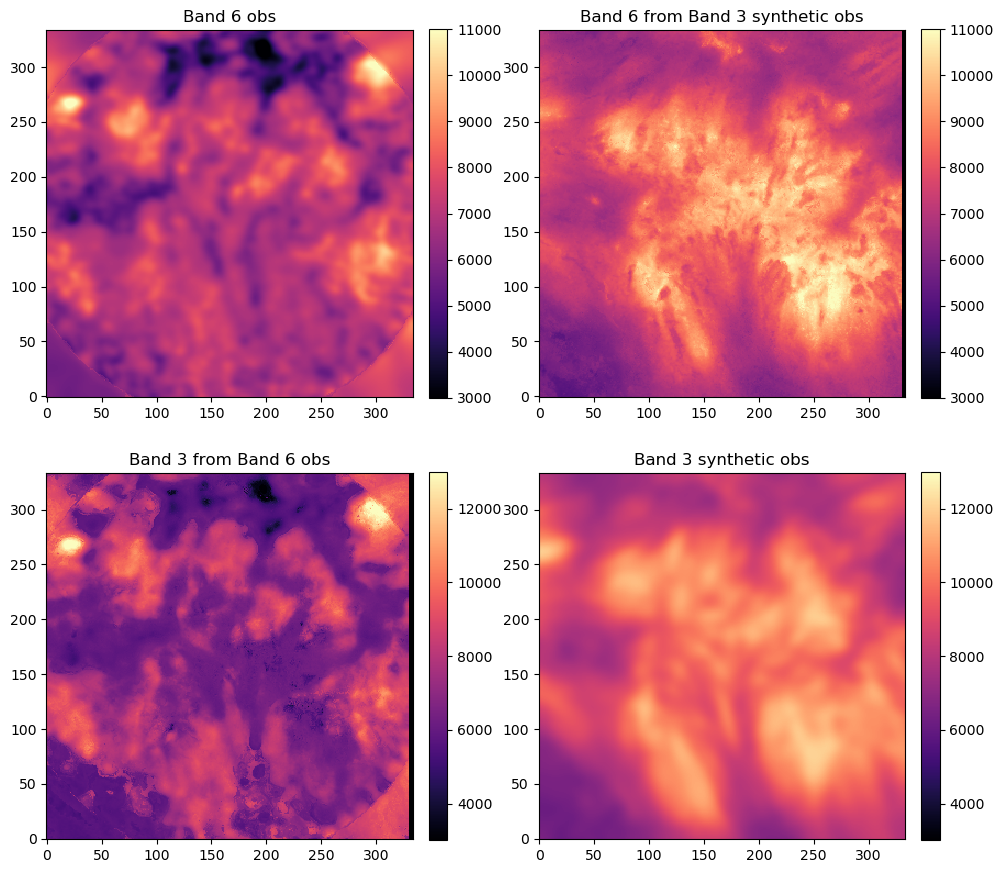

In [89]:
plt.figure(figsize=(10,9))
plt.subplot(221)
plt.imshow(obs.dat[0,:,:,-2,0]*5900,cmap='magma',origin='lower',vmin=3000,vmax=11000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 6 obs')
plt.subplot(222)
plt.imshow(fit_3.dat[0,:,:,-2,0]*5900,cmap='magma',origin='lower',vmin=3000,vmax=11000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 6 from Band 3 synthetic obs')
plt.subplot(223)
plt.imshow(fit_6.dat[0,:,:,-1,0]*7300,cmap='magma',origin='lower',vmin=3000,vmax=13000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 3 from Band 6 obs')
plt.subplot(224)
plt.imshow(obs.dat[0,:,:,-1,0]*7300,cmap='magma',origin='lower',vmin=3000,vmax=13000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Band 3 synthetic obs')
plt.tight_layout()

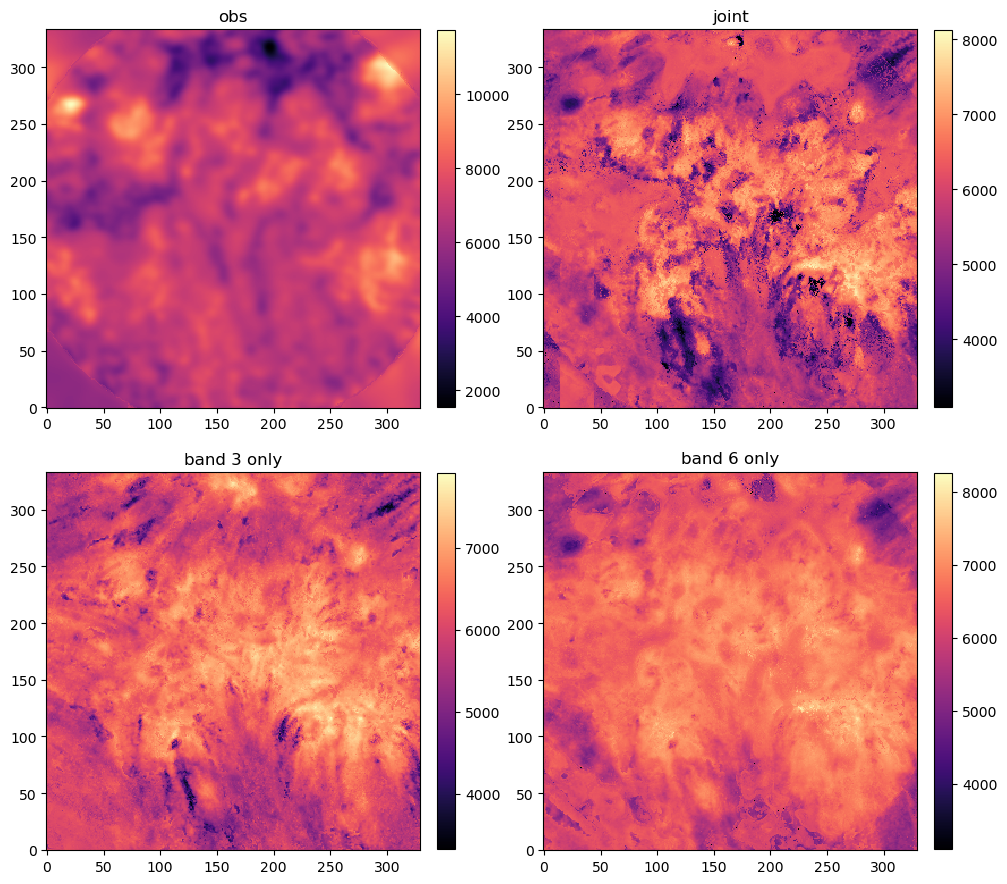

In [93]:
plt.figure(figsize=(10,9))
plt.subplot(221)
plt.imshow(obs.dat[0,:,:330,-2,0]*5900,cmap='magma',origin='lower')
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('obs')
plt.subplot(222)
plt.imshow(mod.temp[0,:,:330,15],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('joint')
plt.subplot(223)
plt.imshow(mod_3.temp[0,:,:330,15],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('band 3 only')
plt.subplot(224)
plt.imshow(mod_6.temp[0,:,:330,15],cmap='magma',origin='lower')
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('band 6 only')
plt.tight_layout()

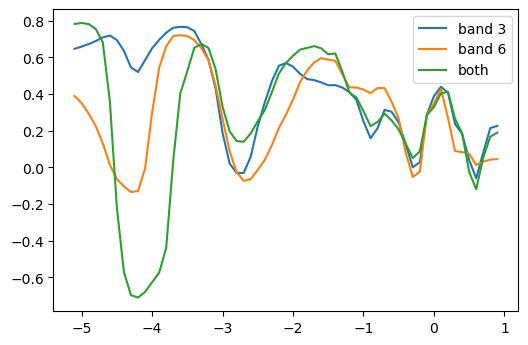

In [87]:
corr_3 = np.zeros(61)
corr_6 = np.zeros(61)
corr = np.zeros(61)
for i in range(61):
    corr_3[i] = np.corrcoef(np.log10(obs.dat[0,:,:330,68,0]).ravel(),mod_3.temp[0,:,:330,i].ravel())[0,1]
    corr_6[i] = np.corrcoef(np.log10(obs.dat[0,:,:330,68,0]).ravel(),mod_6.temp[0,:,:330,i].ravel())[0,1]
    corr[i] = np.corrcoef(np.log10(obs.dat[0,:,:330,68,0]).ravel(),mod.temp[0,:,:330,i].ravel())[0,1]
plt.plot(mod.cmass[0,0,0],corr_3,label='band 3')
plt.plot(mod.cmass[0,0,0],corr_6,label='band 6')
plt.plot(mod.cmass[0,0,0],corr,label='both')
plt.legend()